<a href="https://colab.research.google.com/github/chudinovskihrevda-cmd/Learnig_Prog/blob/main/%D0%9B11(%D1%81%D0%BE%D0%B2%D0%BC%D0%B5%D1%81%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset=pd.read_csv('/content/heart.xls')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


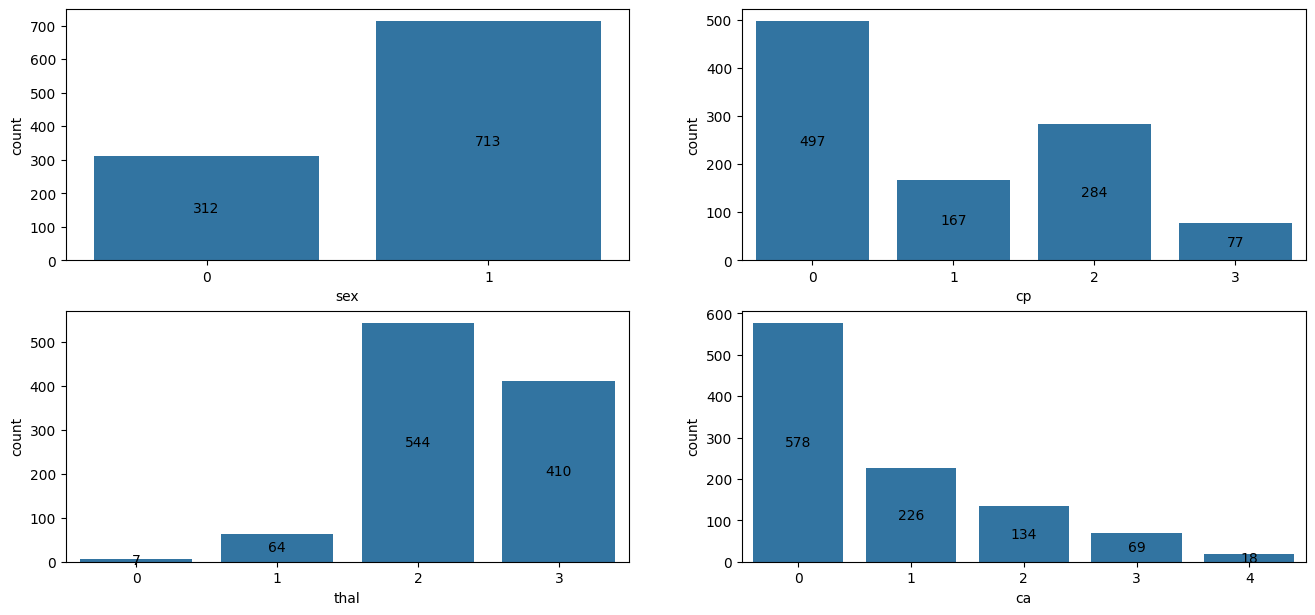

In [ ]:
cols=["sex","cp","thal","ca"]

fig=plt.figure(figsize=(16,15))

for idx,col in enumerate(cols):
  ax=plt.subplot(4,2,idx+1)
  sns.countplot(x=dataset[col],ax=ax)
  for container in ax.containers:
    ax.bar_label(container,label_type="center")

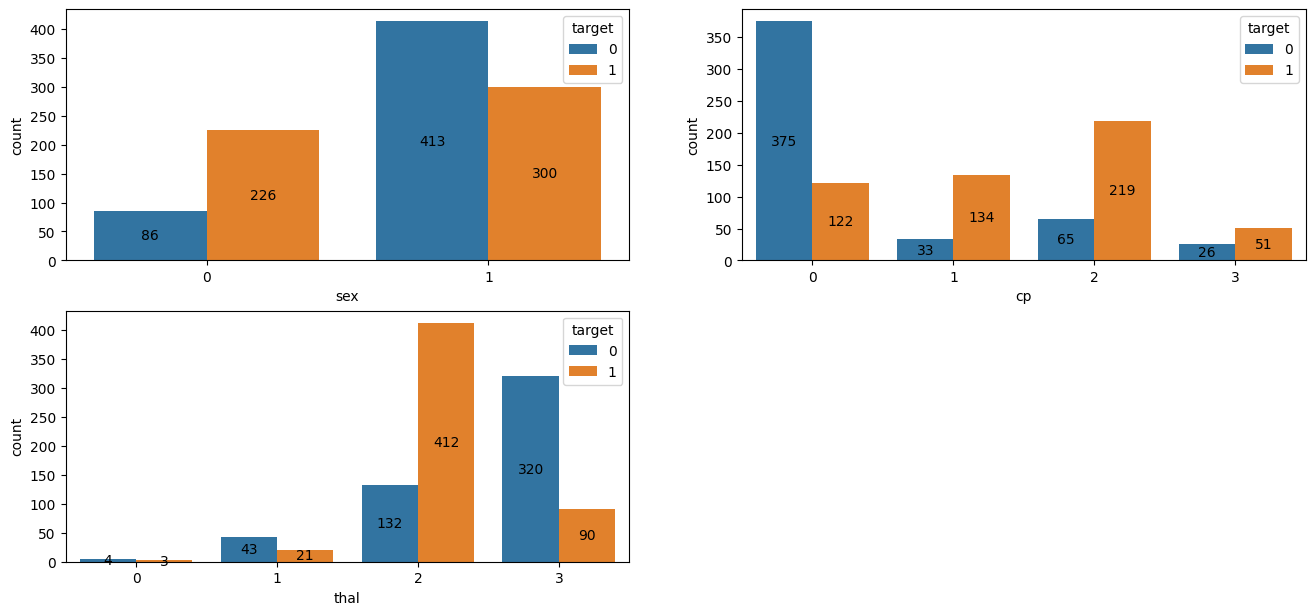

In [ ]:
fig=plt.figure(figsize=(16,15))

for idx,col in enumerate(cols[:-1]):
  ax=plt.subplot(4,2,idx+1)
  sns.countplot(x=dataset[col],ax=ax,hue=dataset['target'])
  for container in ax.containers:
    ax.bar_label(container,label_type="center")

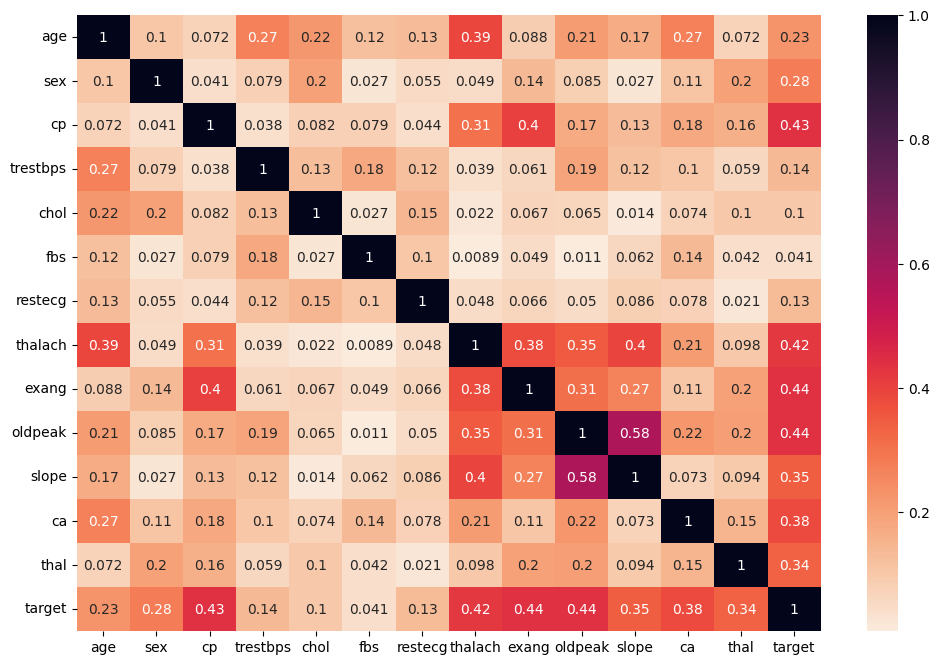

In [ ]:
correlations=abs(dataset.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations,annot=True,cmap="rocket_r")
plt.show()

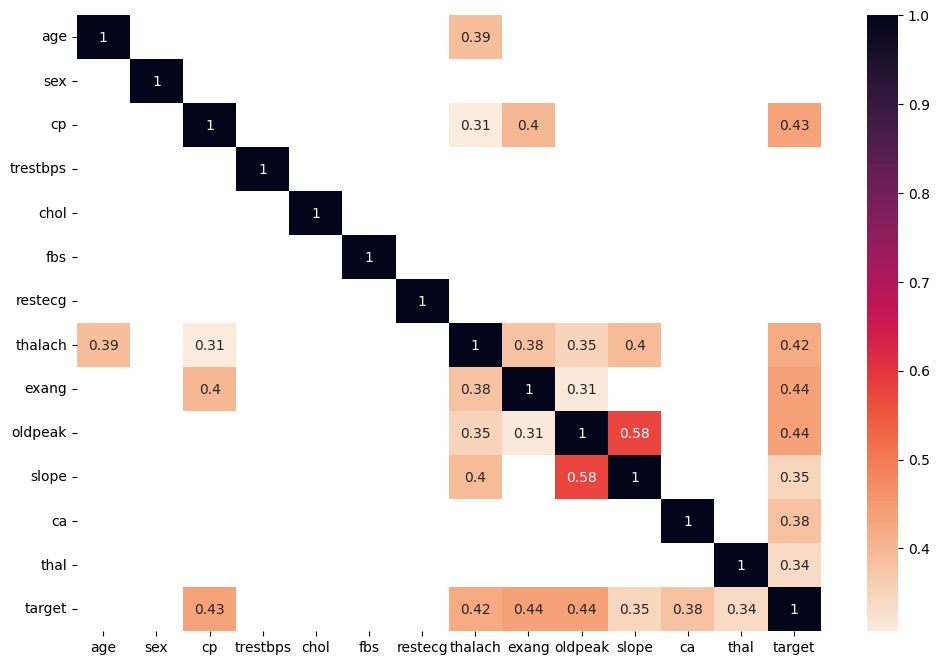

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations>0.30],annot=True,cmap="rocket_r")
plt.show()

In [ ]:
X=dataset.drop(["target"],axis=1)
Y=dataset["target"]

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,Y,test_size=0.10,random_state=417)

In [ ]:
input_dim = X_train.shape[1]
model = tf.keras.Sequential([
        # Входной слой
        Dense(64, activation='relu', input_shape=(input_dim,)),


        # Скрытые слои
        Dense(128, activation='relu'),


        Dense(64, activation='relu'),


        Dense(32, activation='relu'),


        # Выходной слой (бинарная классификация)
        Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

In [ ]:
# Callbacks для улучшения обучения
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

# Обучение модели
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=120,
    batch_size=126,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5759 - auc: 0.5939 - loss: 1.4034 - precision: 0.5939 - recall: 0.6216 - val_accuracy: 0.6408 - val_auc: 0.7184 - val_loss: 0.6451 - val_precision: 0.6438 - val_recall: 0.8103 - learning_rate: 0.0010
Epoch 2/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6552 - auc: 0.7026 - loss: 0.7024 - precision: 0.6826 - recall: 0.6206 - val_accuracy: 0.6311 - val_auc: 0.7238 - val_loss: 0.6143 - val_precision: 0.6316 - val_recall: 0.8276 - learning_rate: 0.0010
Epoch 3/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6639 - auc: 0.7230 - loss: 0.6281 - precision: 0.6817 - recall: 0.6529 - val_accuracy: 0.6990 - val_auc: 0.7600 - val_loss: 0.5769 - val_precision: 0.7015 - val_recall: 0.8103 - learning_rate: 0.0010
Epoch 4/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6596 - auc: 0.7175 - loss: 0.6301 - precision: 0.6664 - recall: 0.6575 - val_accuracy: 0.6505 - val_auc: 0.7623 - val_loss: 0.6290 - val_precisi

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        45
           1       0.78      0.84      0.81        58

    accuracy                           0.78       103
   macro avg       0.78      0.77      0.77       103
weighted avg       0.78      0.78      0.77       103

Confusion Matrix:
[[31 14]
 [ 9 49]]


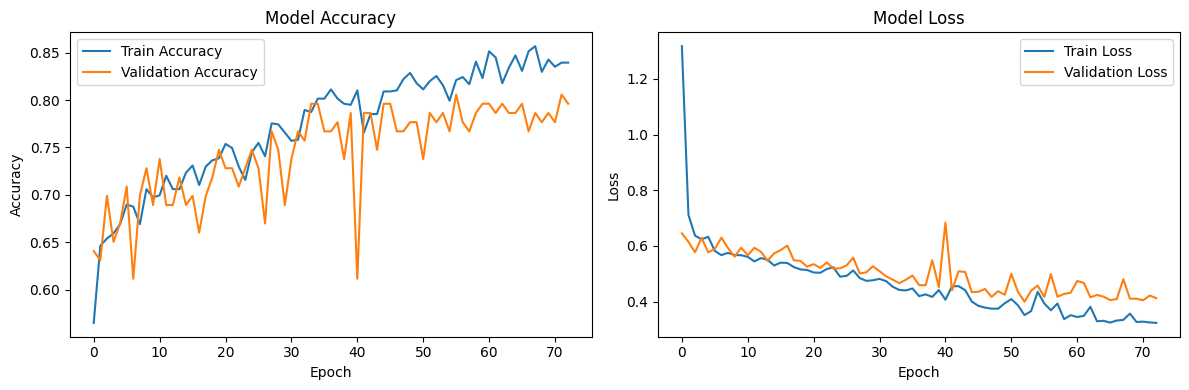

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Предсказания
y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype(int)

# Метрики
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Графики обучения
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)